In [70]:
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn import neighbors
from IPython.display import display as dsp

__Attribute Information:__

1. Sample code number: id number (ID)
2. Clump Thickness: 1 - 10 (ct)
3. Uniformity of Cell Size: 1 - 10 (csu)
4. Uniformity of Cell Shape: 1 - 10 (cshu)
5. Marginal Adhesion: 1 - 10 (ma)
6. Single Epithelial Cell Size: 1 - 10 (secs)
7. Bare Nuclei: 1 - 10 (bn)
8. Bland Chromatin: 1 - 10 (bc)
9. Normal Nucleoli: 1 - 10 (nn)
10. Mitoses: 1 - 10 (mito)
11. Class: (2 for benign, 4 for malignant) (class)

In [71]:
breast = pd.read_csv('data/breast-cancer-wisconsin.data.txt')

breast.columns = range(len(breast.columns))
breast.rename(columns = {0 : 'ID', 1 : 'ct', 2 : 'csu', 3 : 'cshu', 
                        4 : 'ma', 5 : 'secs', 6 : 'bn', 7 : 'bc',
                        8 : 'nn', 9 : 'mito', 10 : 'class'}, inplace = True)

breast.replace('?', np.nan, inplace = True)
breast.dropna(inplace = True)

breast.set_index('ID', inplace = True)

dsp(breast.head())

,ct,csu,cshu,ma,secs,bn,bc,nn,mito,class
ID,,,,,,,,,,
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2
1017122,8,10,10,8,7,10,9,7,1,4


In [72]:
print('Total benign: {}'.format(breast.loc[breast['class'] == 2].ct.count()))
print('Total malignent: {}'.format(breast.loc[breast['class'] == 4].ct.count()))

Total benign: 443
Total malignent: 239


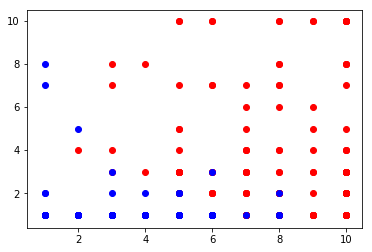

In [76]:
knn = neighbors.KNeighborsRegressor(n_neighbors = 10)

X = breast[['ct','csu','cshu','ma','secs', 'bn', 'bc', 'nn', 'mito']]
Y = breast['class']

knn.fit(X, Y)

y_ben = breast[breast['class'] == 2]
y_mal = breast[breast['class'] == 4]

plt.scatter(
    breast[breast['class'] == 4].ct,
    breast[breast['class'] == 4].mito,
    color = 'red'
)

plt.scatter(
    breast[breast['class'] == 2].ct,
    breast[breast['class'] == 2].mito,
    color = 'blue'
)

plt.title = 'Clump Thickness to Malignancy'

plt.show()